we will develop several models that will predict the price of the car using the variables or features. 
we often use Model Development to help us predict future observations from the data we have.

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression and Multiple Linear Regression

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable
X = df[['highway-mpg']]
Y = df['price']

# fit the linear model using highway-mpg.
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_hat = lm.predict(X)
y_hat[0:5]   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [11]:
lm.intercept_  # intercept (a)

38423.3058581574

In [13]:
lm.coef_  # slope (b)

array([-821.73337832])

we should get a final linear model with the structure:
y_hat = a + bx

In [15]:
# Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable
lm_engine_size = LinearRegression()
lm_engine_size.fit(df[['engine-size']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm_engine_size.intercept_

-7963.338906281042

In [17]:
lm_engine_size.coef_

array([166.86001569])

**Price=-7963.34 + 166.86 * engine-size**

### Multiple Linear Regression

In [19]:
# develop a model using multiple variables as the predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm.intercept_

-15806.62462632922

In [21]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

**Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg**

In [22]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is price, 
# and the predictor variable is 'normalized-losses' and  'highway-mpg'

lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lm2.coef_

array([   1.49789586, -820.45434016])

## 2)  Model Evaluation using Visualization

Evaluate our developed models and choose the best one using visualization

In [24]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### Regression Plot ###

To visualize the fit of our simple linear regression model.

(0, 48270.35742408868)

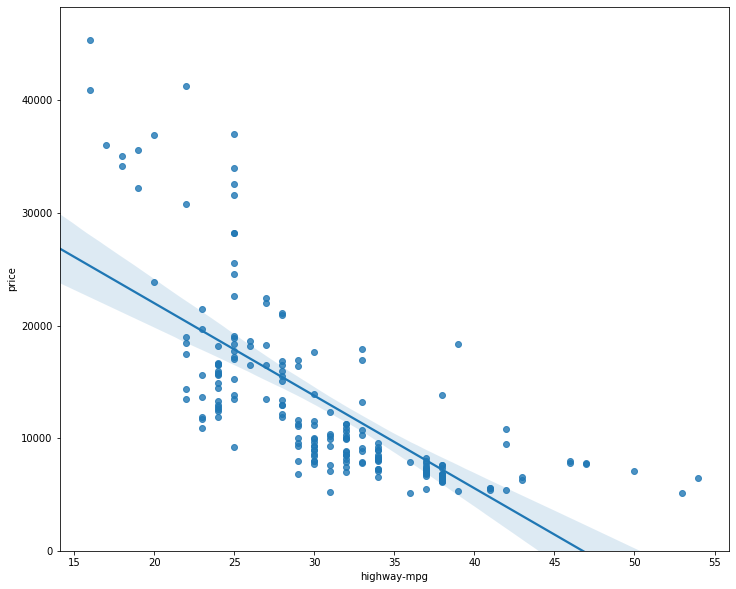

In [28]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

# We can see from this plot that price is negatively correlated 
# to highway-mpg, since the regression slope is negative.

(0, 47422.919330307624)

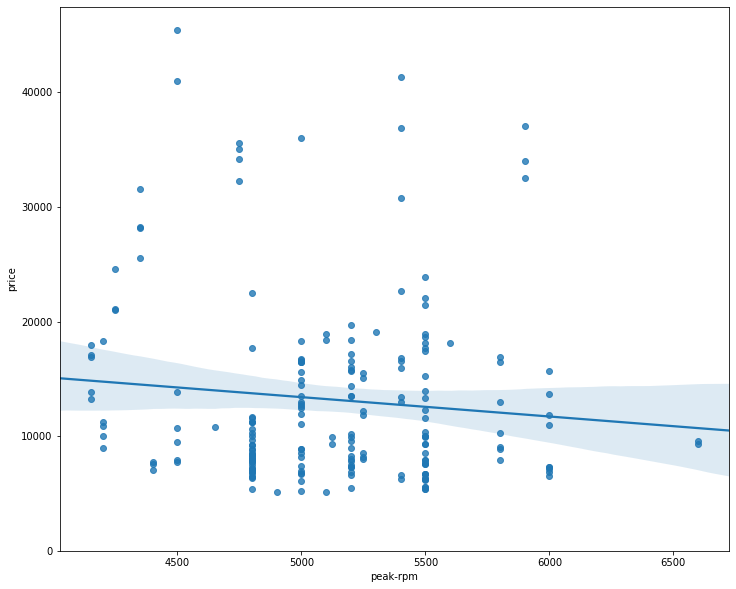

In [29]:
# Let's compare this plot to the regression plot of "peak-rpm".
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

# Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that 
# the points for "highway-mpg" are much closer to the generated line and on 
# the average decrease. The points for "peak-rpm" have more spread around the predicted line, 
# and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

In [30]:
# The variable "highway-mpg" has a stronger correlation with 
# "price", it is approximate -0.704692  compared to   "peak-rpm" 
#  which is approximate     -0.101616. You can verify it using the following command:
df[["peak-rpm","highway-mpg","price"]].corr()


,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#### Residual Plot

To visualize the variance of the data.

Look at the spread of the residuals,  If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

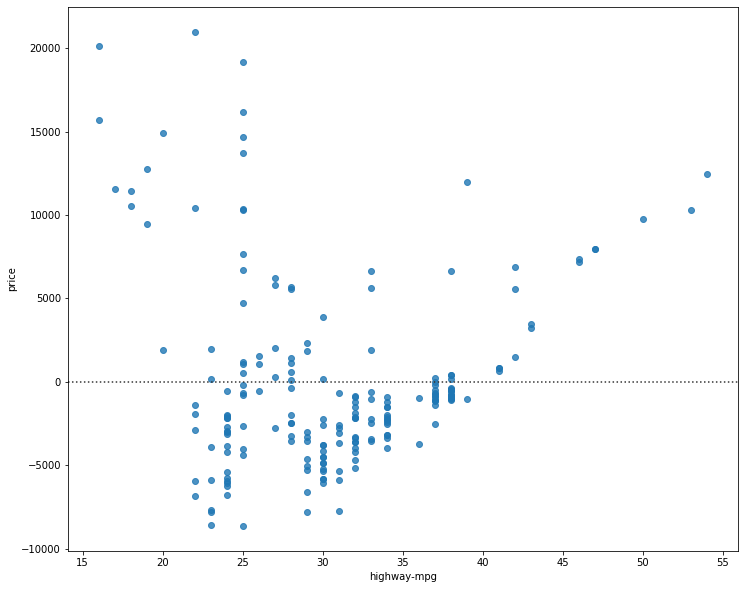

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

# the residuals are not randomly spread around the x-axis, which leads 
# us to believe that maybe a non-linear model is more appropriate for this data.

#### Distribution plot

You cant visualize Multiple Linear Regression with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [32]:
# make a prediction
Y_hat = lm.predict(Z)

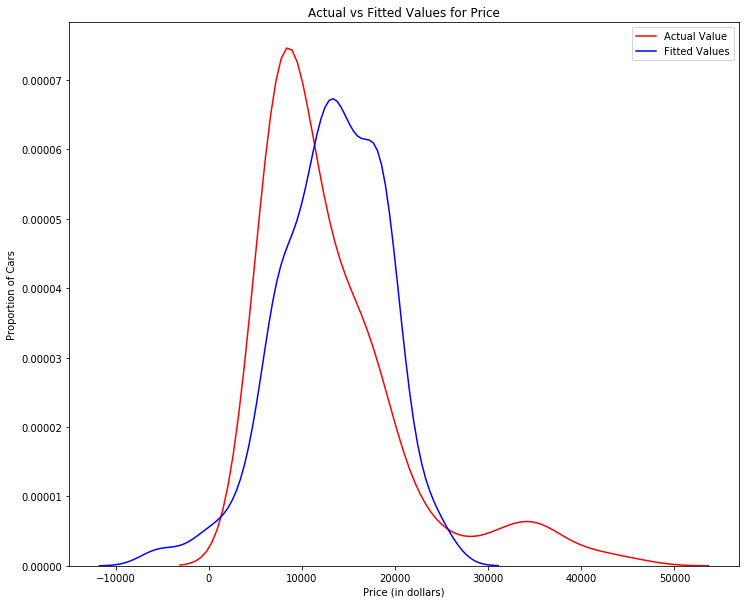

In [33]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()